cubic


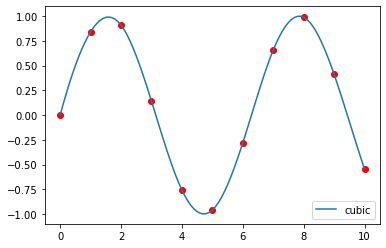

In [39]:
import numpy as np
from scipy import interpolate
import pylab as pl

x=np.linspace(0,10,11)
y=np.sin(x)

xnew=np.linspace(0,10,101)

pl.plot(x,y,'ro')
list1=['cubic']
list2=[3]
for kind in list1:
    print(kind)
    f=interpolate.interp1d(x,y,kind=kind)
    #f是一个函数，用这个函数就可以找插值点的函数值了：
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=kind)

pl.legend(loc='lower right')
pl.show()

In [40]:
ynew

array([ 0.        ,  0.11180295,  0.21812992,  0.31872976,  0.41335129,
        0.50174335,  0.58365479,  0.65883444,  0.72703113,  0.7879937 ,
        0.84147098,  0.88721183,  0.92496506,  0.95447953,  0.97550405,
        0.98778748,  0.99107865,  0.98512639,  0.96967954,  0.94448694,
        0.90929743,  0.86404864,  0.80943343,  0.74633347,  0.6756304 ,
        0.59820591,  0.51494164,  0.42671925,  0.33442041,  0.23892677,
        0.14112001,  0.04189517, -0.05779906, -0.15700062, -0.25474744,
       -0.35007743, -0.44202852, -0.52963865, -0.61194574, -0.68798771,
       -0.7568025 , -0.81755114, -0.86988721, -0.91358738, -0.94842832,
       -0.97418671, -0.99063924, -0.99756258, -0.99473342, -0.98192842,
       -0.95892427, -0.92565828, -0.88271018, -0.83082038, -0.77072923,
       -0.70317713, -0.62890445, -0.54865157, -0.46315886, -0.37316671,
       -0.2794155 , -0.18269057, -0.08395718,  0.01577443,  0.11549404,
        0.2141914 ,  0.31085631,  0.40447851,  0.49404778,  0.57

(6, 1001)


<Figure size 432x288 with 0 Axes>

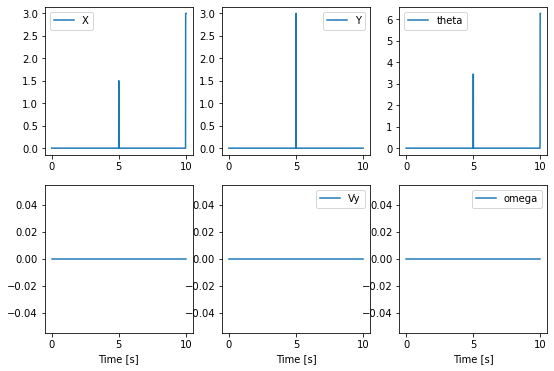

<Figure size 432x288 with 0 Axes>

In [41]:
from __future__ import print_function




import numpy as np
import matplotlib.pyplot as plt
import quadrotor
import math



robot = quadrotor.Quadrotor()
horizon_length = 1000
N = 1000
u_ = robot.mass*robot.g/2
z0 = np.array([1,0,0,0,0,0]).reshape([6,])
u0 = u_ * np.ones([2,1])
o = (2*math.pi/10)/6
r = 1
T = 10
middle = 500
tau = 0.6


# x_desired = [math.cos(o*(T/N)*i) for i in range(0,N+1)]
# y_desired = [r*math.sin(o*(T/N)*i) for i in range(0,N+1)]
# vx_desired = [-r*o*math.sin(o*(T/N)*i) for i in range(0,N+1)]
# vy_desired = [ r*o*math.cos(o*(T/N)*i) for i in range(0,N+1)]
# theta_desried = [0 for i in range(0,N+1)]
# omega_desried = [0 for i in range(0,N+1)]



def generate_place(i):
    t = T/N*i
    return 3*math.e**(-abs(t-5)/tau)
def generateV(i):
    t = T/N*i
    if i<middle:
        return 3/tau*math.e**(-abs(t-5)/tau)
    elif i == middle:
        return 0
    else:
        return -3/tau*(math.e**(-abs(t-5)/tau))
def generate_theta(i):
    t = T/N*i
    return math.pi/2*math.e**(-abs(t-5)/tau)
def generate_omega(i):
    t = T/N*i
    if i<middle:
        return math.pi/2/tau*math.e**(-abs(t-5)/tau)
    elif i == middle:
        return 0
    else:
        return -math.pi/2/tau*math.e**(-abs(t-5)/tau)
    
x_desired = [generate_place(i) for i in range(N+1)]
vx_desired = [generateV(i) for i in range(N+1)]
y_desired = [generate_place(i) for i in range(N+1)]
vy_desired = [generateV(i) for i in range(N+1)]
theta_desried = [generate_theta(i) for i in range(N+1)]
omega_desried = [generate_omega(i) for i in range(N+1)]




state_desired = np.array([x_desired,vx_desired,y_desired,vy_desired,theta_desried,omega_desried])

state_desired = np.zeros_like(state_desired)
state_desired[:,middle] = np.array([1.5,0,3,0,1.1*math.pi,0])
state_desired[:,-1] = np.array([3,0,0,0,2*math.pi,0])
state_desired[:,-2] = np.array([3,0,0,0,2*math.pi,0])
state_desired[:,-3] = np.array([3,0,0,0,2*math.pi,0])
ref_traj = state_desired.T
z0 = np.zeros_like(state_desired[:,0])
u_init = [(robot.mass * robot.g / 2) * np.ones([2]) for _ in range(horizon_length)]
print(state_desired.shape)


t = [T/N*i for i in range(N+1)]
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state_desired[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state_desired[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state_desired[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state_desired[1,:])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state_desired[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state_desired[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()

In [42]:

import solver
try:
    import jax.numpy as np
except ImportError:
    import numpy as np

class iLQR_Track_Controller:
    def __init__(self,R,dt,use_autograd = False):
        self.aux = None
        self.R_ = R
        self.dt_ = dt

        #desired functions for plant dynamics and cost
        self.plant_dyn_ = None
        self.plant_dyn_dx_ = None
        self.plant_dyn_du_ = None

        self.cost_ = None
        self.cost_dx_ = None
        self.cost_du_ = None
        self.cost_dxx_ = None
        self.cost_duu_ = None
        self.cost_dux_ = None

        self.ilqr_ = None

        self.use_autograd=use_autograd
        return

    def build_iLQR_tracking(self,ref_pnts, weight_mats,obj):
        #obj must have next_state,  get_linearization
        self.obj = obj
        #figure out dimension
        self.T_ = len(ref_pnts)# leave the last point alone


        self.ref_array = np.copy(ref_pnts)
        self.weight_array = [mat for mat in weight_mats]
        #clone weight mats if there are not enough weight mats
        for i in range(self.T_ - len(self.weight_array)):
            self.weight_array.append(self.weight_array[-1])


        def tmp_cost_func(x, u, t, aux):
            err = x - self.ref_array[t]
            #autograd does not allow A.dot(B)
            cost = np.dot(np.dot(err, self.weight_array[t]), err) + np.sum(u**2) * self.R_
            return cost

        self.cost_ = tmp_cost_func
        self.ilqr_ = solver.Solver(T=self.T_ - 1, plant_dyn=self.plant_dyn_, cost=self.cost_,
                                   use_autograd=self.use_autograd)
        if not self.use_autograd:
            self.plant_dyn = lambda x, u, t, aux:obj.next_state(x,u,t)
            self.plant_dyn_du_ = lambda x, u, t, aux: obj.get_linearization(x, u, t)[0]
            self.plant_dyn_dx_ = lambda x, u, t, aux: obj.get_linearization(x, u, t)[1]
            def tmp_cost_func_dx(x, u, t, aux):
                err = x - self.ref_array[t]
                grad = np.concatenate([2 * err.dot(self.weight_array[t])])
                return grad

            self.cost_dx_ = tmp_cost_func_dx

            self.cost_du_ = lambda x, u, t, aux: 2 * self.R_ * u

            def tmp_cost_func_dxx(x, u, t, aux):
                hessian = np.zeros((self.obj.ns,self.obj.ns))
                hessian = 2 * self.weight_array[t]
                return hessian

            self.cost_dxx_ = tmp_cost_func_dxx

            self.cost_duu_ = lambda x, u, t, aux: 2 * self.R_ * np.eye(self.obj.nu)
            self.cost_dux_ = lambda x, u, t, aux: np.zeros((self.obj.nu,self.obj.ns))

            # build an iLQR solver based on given functions...
            self.ilqr_.plant_dyn = self.plant_dyn
            self.ilqr_.plant_dyn_dx = self.plant_dyn_dx_
            self.ilqr_.plant_dyn_du = self.plant_dyn_du_
            self.ilqr_.cost_dx = self.cost_dx_
            self.ilqr_.cost_du = self.cost_du_
            self.ilqr_.cost_dxx = self.cost_dxx_
            self.ilqr_.cost_duu = self.cost_duu_
            self.ilqr_.cost_dux = self.cost_dux_
        return

    def synthesize_trajectory(self,x0, u_array=None, n_itrs=50, tol=1e-6, verbose=True):
        if self.ilqr_ is None:
            print('No iLQR solver has been prepared.')
            return None
        #initialization doesn't matter as global optimality can be guaranteed?
        if u_array is None:
            u_init = [np.zeros(self.obj.nu) for i in range(self.T_-1)]
        else:
            u_init = u_array
        x_init = np.zeros(self.obj.ns)
        x_init[:len(x0)] = x0

        # res = self.lqr_.ilqr_iterate(x_init, u_init, n_itrs=n_itrs, tol=tol, verbose=verbose)
        res_dict = self.ilqr_.LQR_solve(x_init, u_init)
        x_star = res_dict['x_array_star']
        Ks = res_dict['K_array_opt']
        ks = res_dict['k_array_opt']
        x_array_new, u_array_new = self.apply_control(x_star, u_init, ks, Ks,alpha=1)
        return x_array_new[:, 0:self.obj.nu]

    def get_rule(self,x0, u_array=None, n_itrs=50, tol=1e-6, verbose=True):
        if self.ilqr_ is None:
            print('No iLQR solver has been prepared.')
            return None
        #initialization doesn't matter as global optimality can be guaranteed?
        if u_array is None:
            u_init = [np.zeros(self.obj.nu) for i in range(self.T_-1)]
        else:
            u_init = u_array
        x_init = np.zeros(self.obj.ns)
        x_init[:len(x0)] = x0

        # res = self.lqr_.ilqr_iterate(x_init, u_init, n_itrs=n_itrs, tol=tol, verbose=verbose)
        res_dict = self.ilqr_.iLQR_iteration(x_init, u_init,n_itrs)
        # x_star = res_dict['x_array_star']
        # Ks = res_dict['K_array_opt']
        # ks = res_dict['k_array_opt']
        # xs = res_dict['x_array_opt']
        # us = res_dict['u_array_opt']
        return res_dict

    def controller(self,u,x,k_array,K_array):
        pass

    def apply_control(self, x_array, u_array, k_array, K_array,alpha=1) :
        x_new_array = [None] * len(x_array)
        u_new_array = [None] * len(u_array)
        x_new_array[0] = x_array[0]
        for t in range(self.T_ -1 ):
            u_new_array[t] = u_array[t] + alpha * (k_array[t] + K_array[t].dot(x_new_array[t]-x_array[t]))
            x_new_array[t+1] = self.obj.next_state(x_new_array[t], u_new_array[t], t)
        return np.array(x_new_array), np.array(u_new_array)






In [46]:
weight_mats = [100*np.diag([60,0,40,0,500,0])*(math.e**(-abs(i-middle)/100)) for  i in range(len(ref_traj))]

weight_mats = [np.zeros_like(mat) for mat in weight_mats]
weight_mats[middle] = np.diag([100,0,100,0,100,0])
weight_mats[-1] = np.diag([100,0,100,0,100,0])
weight_mats[-2] = np.diag([100,0,100,0,100,0])
weight_mats[-3] = np.diag([100,0,100,0,100,0])

In [47]:

ilqr_traj_ctrl = iLQR_Track_Controller(R=.01, dt=0.01)
ilqr_traj_ctrl.build_iLQR_tracking(ref_traj, weight_mats, robot)
x0 = ref_traj[0]
res = ilqr_traj_ctrl.get_rule(x0, u_init,n_itrs = 200, tol = 1)
x_array = res["x_array_opt"]
u_array = res["u_array_opt"]
k_array = res["k_array_opt"]
K_array = res["K_array_opt"]
def ilqr_controller(state,i):
    ut = K_array[i].dot(state-x_array[i]) + k_array[i] + u_array[i]
    return ut.T
t, state, u = robot.simulate(z0,ilqr_controller, horizon_length, disturbance = False)

Reject the control perturbation. Increase the regularization term.
Reject the control perturbation. Increase the regularization term.
Reject the control perturbation. Increase the regularization term.
Iteration 4:	J = 10842.169453553106;	norm_k = 0.9297313936471412;	reg = 1.0
Reject the control perturbation. Increase the regularization term.
Reject the control perturbation. Increase the regularization term.
Iteration 7:	J = 8998.027784222279;	norm_k = 0.17060479412832216;	reg = 2.0
Reject the control perturbation. Increase the regularization term.
Iteration 9:	J = 8810.135419523664;	norm_k = 0.09173757552300094;	reg = 2.0
Iteration 10:	J = 8718.481645513359;	norm_k = 0.6123994883543645;	reg = 1.0
Reject the control perturbation. Increase the regularization term.
Reject the control perturbation. Increase the regularization term.
Reject the control perturbation. Increase the regularization term.
Iteration 14:	J = 8217.374310296565;	norm_k = 0.029594410936906148;	reg = 3.0
Iteration 15:	J

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAANQdtZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA2rZYiEABH//veIHzLL
afk613IR560urR9Q7kZxXqS9/iAAAAMAAAMAAOSq/2+9Zj+im+AAABXQArISJA0agX3rQrxAFVDm
jgk//Zy6/Zkysf1BBlzSMecs0adU4czxdWu3ATn6Hlfa1lvTJVwFeJzzgStuUpMltOrgd3xiXeRy
NijQbA3SBfm/fv33UGxcJxjDaZrIZWJfsESDGQ+3B//+mxNP94N7yss6aV0xf5e1Y3eMSRhlnOEg
5t6laqwn4ehgEZ2RN/0//u4oRdcLZiHU1WyaHTtereEHbjvfPBTFNygr8URVeaLIHKnoz7eFX5dJ
5BLMgkwG6DYtoE/yA/qBva+1HG9dLso+HX9qz9vPI75MahHUu6vK+1J58JMjWbYnI//bZrrAAA5m
+lNSqA7Y3Jz+cejY/yaAwuX1ba/gNpuUACHjQpctA6IwDR5NeFI1TjyFjAhWgUzyDeXFDtYkkil8
a6gWSH4zzOgO9oNVUUPhXGl9rI0GTKS/4UstkFTsHnaBigcDRPYCQGQbf4Uimk4BYb53zk6N77Mv
SUvr5bWpZXoO6GuCbY9fOGtm/83l2O1ZLSp8bISiv+W/mKQh3mkn3Hk/FzyfVfSocPF0cFEubbJc
frv/HsbvVXJOgFLnzNK5SYIkQy/DrsF94ZHlct+UaXRpPEHEQSQW9+7cCxRUm1cCu4Xv2VqNhLgJ
bH/pz/0DGWy8MVq3JKMY05hpbR61fOdWoypz37fkANgpTRRrq9AOl9QCxZtbGrQ67r5A327hcEeU
FXdaeyfQH/ZUE7GDgI30ZcbTO59yhRneVi6hvmDb+TrewAAHcEy0lw0DwE4wCIJIIBiCAuxFYjio
XfHp3KTe0J/q5bpZ0ICnhmJ8otdTkMmv7edvxy0bZ/gah/wrq3deqcRo6g8lwDjDCvzNfpeZsTaa
Csd/N63Ugnku7JxBHvYjPA/pyd34cdKKxgRpjpSAipTKY9OevUjE/+kGCaCne0aP28W/YgJho+VZ
NMeMszFDrRxih7Q7l+GXrGTROCODhji9xSHDYIgDKLH62sOcrU/giJg5lbLK6fAbICslptr4Dhti
r6+ArNgzVwGWqznPm2y/oOGSCp79Bba9+9iGf5kYv/vReC5ORnSWHDBdn9b2VbHKwoW3vbfkrFcs
EaLooMgfGiKBwjy0x453peosGF/INBTZb9mzHH+HBaHVgAAQEtMEoUjefzBbNWRY6JOE1gf5IdQK
hE4aij2J6/vMF3Y4T4VbCxjbFDHHE7yfj8wt7ZKQOAZYOxh5Gmqn//crRr4p4DFGb+udQ7lWGjbg
lI/7P8sze8GrmOJFOR7zFLKd/lwJ/XN0bb4qox8QjQloaVhDMPKbLGIygrb+xlRrugDsmECKN27/
F/8+IN9zEdjaXfC6LjVv2CxH0PvRTaCM5D9S0qNaH7Ua5ij+f32Nv3PeSFEVVcU1+paVGtEGbQMN
JKAcBojQl71wUtoGrMc1lrrJfGkBfxXt5ibutpzvI5peoLhujTauVLLX8xZlTt2gZpnySNz7Gw1a
Alf2d1Q7QSun9RzWWUePcZiFyf2tXGzqO0AAAAMAAawFV3gZtVtstJWNELko3YJB1AUqFyiIMN4s
4aQ222Sr0aB+OYFr7z/4FOYykTQhydz4XNSTopgJEEHzjSMtI/iSXt9UDCxFdnNgcQGiX25/fqag
NQ2/ydUxkY8TPuiR4fPSP8yu+Qkg2vtl7Em0qsWyBODmr9yHwAhiTNy4bubPIg9b+xr8rgqvubDI
t55i245SvEZ7PiL5/kUJsaRwPbrt7ASDN7vzHyEyu+VQvi/expnR6PpI3pvON+wo1sPY/7ot68+Q
QYEavF8kMKrIs4ST5nZEToIEjstAGIXcUoQlFMYiIPQM9cOipNveBFEIYOvIzwL1Z3x6OZgNHiKB
6rlBTUBJw0oDnr+pGxHMfcjbZ0C9eccLOLZXQn7fDGXKM9EbvJwiPRkpRYVkEo49qpAvXh2bVlyH
QrtVc9blJ3VdZYZoWROknUAx5rXSrRIigfNyDg6f1jx9i/F6Hp/+NfjHTnkGdKvAZU9Z1NzoHa/Q
kM5HNICzoa31qt4i93JZSZBCamylYVKe7c/2T8oKh66LYUYg3UX3DaCg/aWAzmEXDHFVfsCKyZRQ
oppCIcaV/ZBEPDCUW0CKNRtg0nOLudOUhrCHC/wq7UY8q8ydJFmZ1GvLwQr/6DeIcNDcoikgGN1A
AGGXSjqtQQahAAADASH0CZ3rCeeNhOQB6DFkC+ZQTfi//PAadVeLUCHXjq3uHNp657thV8/Eemgb
DiQdj/m2sMXW82W4cyFLnMNmEn7Am/Ug2kN+EWaWaFokw5imiKRql68UrwABtdtYVyhVHSjpPwXa
uiEPjNOF+OA+FHvjYgwtVkAfcoNcuJV+9QPWTM5KRDGlchMJ+yPuA428b1/XC1QTVf2y4aVYnM8+
eNSMGm74vNzPM8RNNqMIGKs3CZhVFn5k3vCyuWY1vRs3nSlKCGSMny9KkpUnMacMuCecrbMOfOxK
MoFLR4vU/nLKxyRfvPkl5MUwhQPBPfIpWfenUp1+LfP9FTOAuAABcdTuAAADACrkSmKFSICOaf3w
MptQLXVVFhj/zr9RQRTUtXzqtqS1gm+L765zAQXNNt7H3ltyuCwIj3K8pEb9NFGThrlXhMSvxfUZ
vZnhmJonS011zlcN5gblztJmaubNqHCDoV6adw1y31iGhtM0ZLsEoaM+NxWI6f1jWfUxn54sASPQ
ZLi/NjMubpe/1w8jRELZ5S0nnpOQVZznLzD0xsimb+mySecaHxybt0Q7TpeTx+ksD55ijlJ10i1X
qlZxADE2rI5eZiZZ2ubVwWH7lQs4iNlUvaDgan1CipKbwo9BWC1i0UYVz/7hw6gAAAMAA+rPUnu0
L7LlpcWYXUMKcya4S5/z9

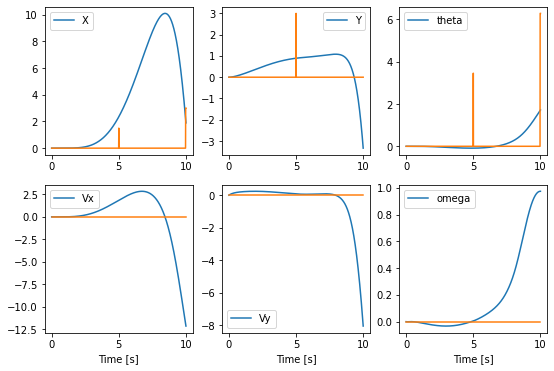

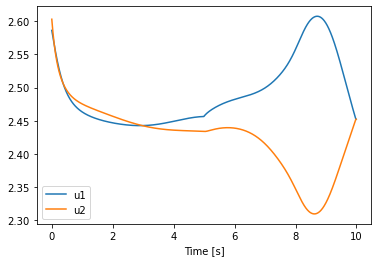

In [48]:



# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.plot(t, state_desired[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.plot(t, state_desired[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.plot(t, state_desired[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.plot(t, state_desired[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.plot(t, state_desired[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.plot(t, state_desired[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
robot.animate_robot(state,u)
